## 对ID和OOD样本进行softmax可视化以及标准差分析

In [5]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import Model

# 设置tf GPU
# print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)
    
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

1 Physical GPUs, 1 Logical GPUs


In [ ]:
from utils import *
from tqdm import tqdm
ood2label = {True: 0, False: 1}
data_test_1 = pd.read_csv('data_test_1.csv')
data_ood = data_test_1[data_test_1['id']==False]
path_ood = data_ood['name'].to_list()
model_random = keras.models.load_model('../model/malconv_split.h5')

batch_size = 100
for idx in tqdm(range(0, len(path_ood), batch_size)):
    code_tmp = codes_loader(path_ood[idx: idx + batch_size])
    logits_tmp = model_random.predict(code_tmp)
    logits_ood = logits_tmp if idx == 0 else np.concatenate((logits_ood, logits_tmp), axis = 0)

# model_random = keras.models.load_model('../model/malconv_split.h5')
# logits_ood = model_random.predict(codes_odd)
soft_ood = keras.backend.softmax(logits_ood)
soft_ood = soft_ood.numpy()
soft_ood = np.max(soft_ood, axis=1)

In [19]:
from utils import *
from tqdm import tqdm
ood2label = {True: 1, False: 0}
data_test_1 = pd.read_csv('data_test_1.csv')
path_name_1 = data_test_1['name'].to_list()
model_split = keras.models.load_model('../model/malconv_split.h5')
label_test_1 = data_test_1['id'].map(lambda x: ood2label[x])
label_test_1 = label_test_1.to_list()

batch_size = 100
for idx in tqdm(range(0, len(path_name_1), batch_size)):
    code_tmp = codes_loader(path_name_1[idx: idx + batch_size])
    logits_tmp = model_split.predict(code_tmp)
    logits_1 = logits_tmp if idx == 0 else np.concatenate((logits_1, logits_tmp), axis = 0)

soft_1 = keras.backend.softmax(logits_1)
soft_1 = soft_1.numpy()
soft_1 = np.max(soft_1, axis=1)


data_test_2 = pd.read_csv('data_test_2.csv')
path_name_2 = data_test_2['name'].to_list()
model_split = keras.models.load_model('../model/malconv_split.h5')
label_test_2 = data_test_2['id'].map(lambda x: ood2label[x])
label_test_2 = label_test_2.to_list()

batch_size = 100
for idx in tqdm(range(0, len(path_name_2), batch_size)):
    code_tmp = codes_loader(path_name_2[idx: idx + batch_size])
    logits_tmp = model_split.predict(code_tmp)
    logits_2 = logits_tmp if idx == 0 else np.concatenate((logits_2, logits_tmp), axis = 0)

soft_2 = keras.backend.softmax(logits_2)
soft_2 = soft_2.numpy()
soft_2 = np.max(soft_2, axis=1)

100%|██████████| 21/21 [01:26<00:00,  4.12s/it]


In [20]:
print(len(soft_1))
print(len(label_test_1))
print(len(soft_2))
print(len(label_test_2))

1948
1948
2094
2094


fpr: 0.045454545454545456
score_1:  0.92999715
auc: 0.9587604424560947


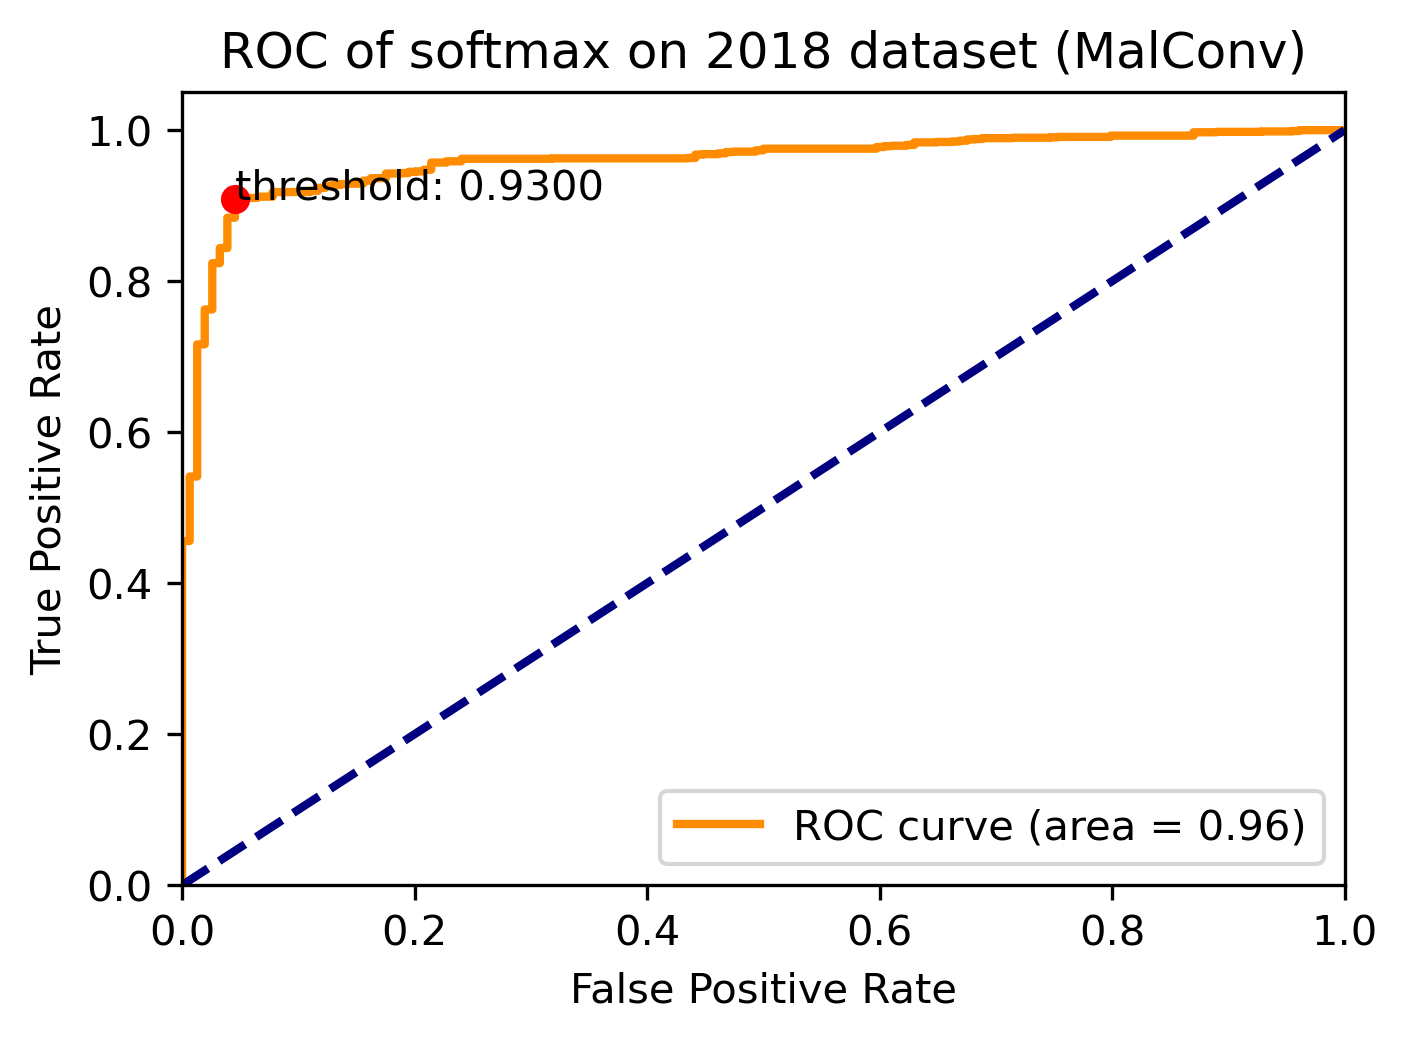

fpr: 0.045454545454545456
score_2:  0.92999715
auc: 0.9587604424560947


<Figure size 432x288 with 0 Axes>

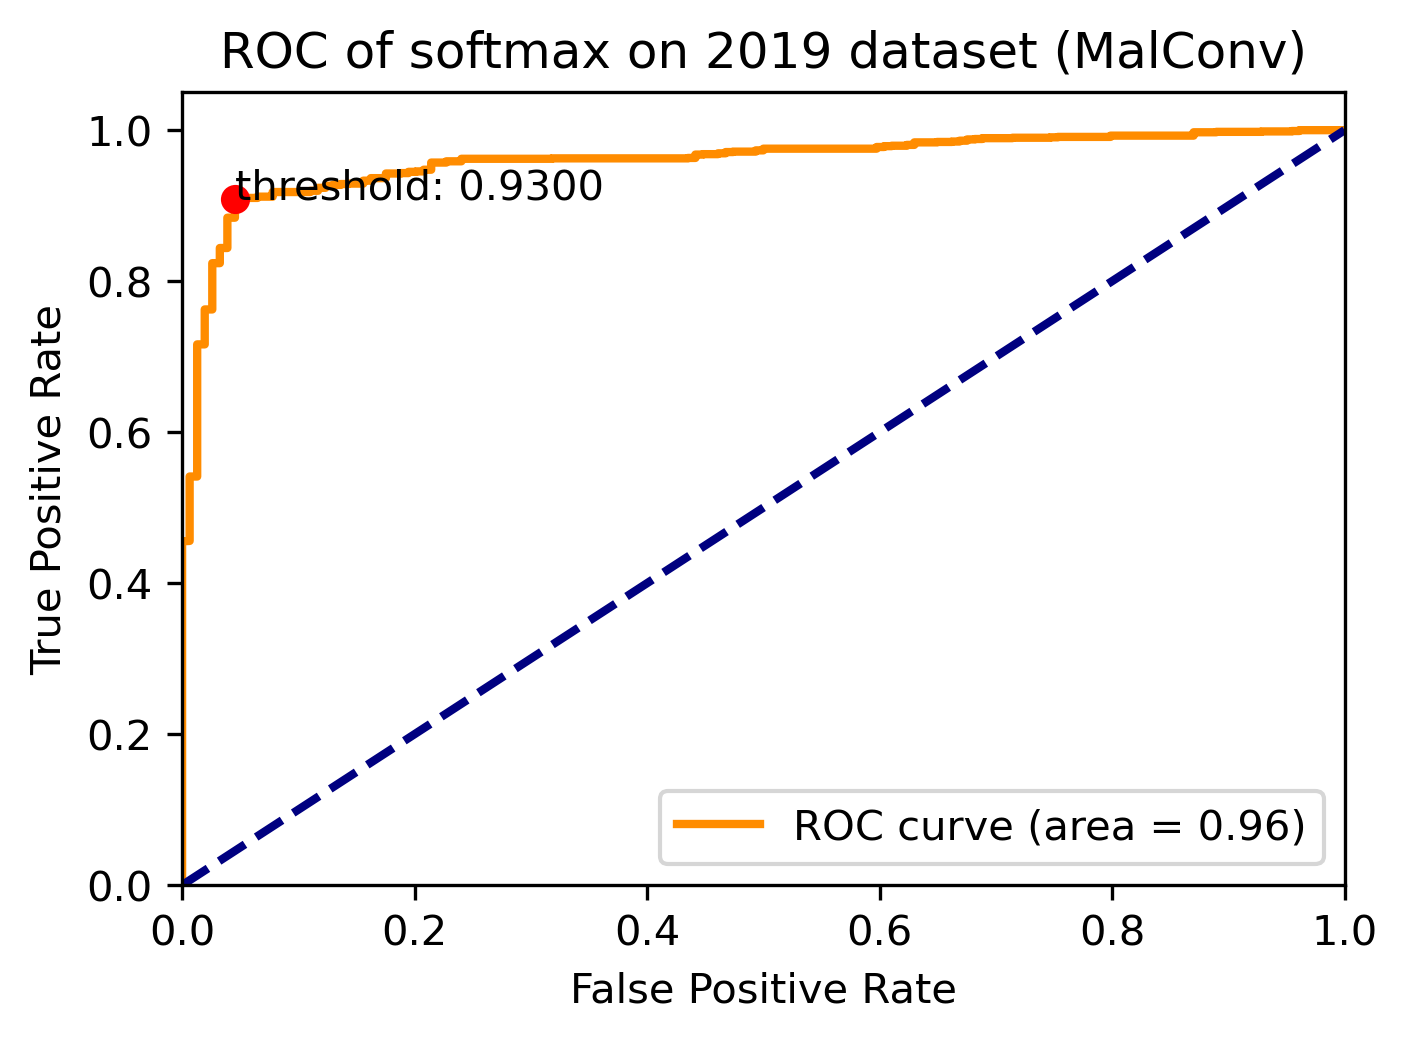

<Figure size 432x288 with 0 Axes>

In [21]:
from sklearn.metrics import roc_curve, auc 
import matplotlib.pylab as plt 

# 确定异常检测阈值
fpr, tpr, thresholds = roc_curve(label_test_1, soft_1)
roc_auc = auc(fpr, tpr)

index = np.argmax(tpr-fpr)
print(f"fpr: {fpr[index]}")
score_1 = thresholds[index]
print("score_1: ", score_1)
print(f"auc: {roc_auc}")

# 绘制roc曲线
plt.figure(figsize=(5, 3.5), dpi=300)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr[index], tpr[index], marker='o', color='r')
plt.text(fpr[index], tpr[index], f"threshold: {score_1:.4f}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of softmax on 2018 dataset (MalConv)')
plt.legend(loc="lower right")
plt.show()
plt.savefig("./figures/" + "roc_softmax_malconv_1.png")

# 确定异常检测阈值
fpr, tpr, thresholds = roc_curve(label_test_1, soft_1)
roc_auc = auc(fpr, tpr)

index = np.argmax(tpr-fpr)
print(f"fpr: {fpr[index]}")
score_2 = thresholds[index]
print("score_2: ", score_2)
print(f"auc: {roc_auc}")

# 绘制roc曲线
plt.figure(figsize=(5, 3.5), dpi=300)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.plot(fpr[index], tpr[index], marker='o', color='r')
plt.text(fpr[index], tpr[index], f"threshold: {score_1:.4f}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of softmax on 2019 dataset (MalConv)')
plt.legend(loc="lower right")
plt.show()
plt.savefig("./figures/" + "roc_softmax_malconv_2.png")


In [23]:
# 剔除异常样本，查看检测报告
bool_1 = soft_1 > score_1
name2label = {'trojan':0, 'virus':1, 'worm':2, 'backdoor':3}
labels_pre_id = data_test_1['label'].map(lambda x: name2label[x])
labels_pre_id = np.array(labels_pre_id).reshape(-1, 1)
labels_pre_id = labels_pre_id[bool_1]
paths_test_1 = data_test_1['name'].to_list()

model_pre = keras.models.load_model('../model/malconv_split.h5')
bool_code = bool_1.reshape(-1)


# 分批预测
batch_size = 200
for idx in tqdm(range(0, len(paths_test_1), batch_size)):
    code_test_tmp = codes_loader(paths_test_1[idx: idx+batch_size])
    code_id_tmp = code_test_tmp[bool_code[idx: idx+batch_size]]
    y_pred_tmp = model_pre.predict(code_id_tmp)
    y_pred_tmp = np.argmax(y_pred_tmp, axis=1)
    y_pred = y_pred_tmp if idx == 0 else np.concatenate((y_pred, y_pred_tmp), axis=0)

target_names = {'trojan', 'virus', 'worm', 'backdoor'}
print(classification_report(labels_pre_id, y_pred, target_names=target_names, digits=4))

bool_2 = soft_2 > score_2 
labels_pre_id = data_test_2['label'].map(lambda x: name2label[x])
labels_pre_id = np.array(labels_pre_id).reshape(-1, 1)
labels_pre_id = labels_pre_id[bool_2]
paths_test_2 = data_test_2['name'].to_list()

model_pre = keras.models.load_model('../model/malconv_split.h5')
bool_code = bool_2.reshape(-1)


# 分批预测
batch_size = 200
for idx in tqdm(range(0, len(paths_test_2), batch_size)):
    code_test_tmp = codes_loader(paths_test_2[idx: idx+batch_size])
    code_id_tmp = code_test_tmp[bool_code[idx: idx+batch_size]]
    y_pred_tmp = model_pre.predict(code_id_tmp)
    y_pred_tmp = np.argmax(y_pred_tmp, axis=1)
    y_pred = y_pred_tmp if idx == 0 else np.concatenate((y_pred, y_pred_tmp), axis=0)

target_names = {'trojan', 'virus', 'worm', 'backdoor'}
print(classification_report(labels_pre_id, y_pred, target_names=target_names, digits=4))

100%|██████████| 10/10 [01:17<00:00,  7.74s/it]


              precision    recall  f1-score   support

        worm     0.9875    1.0000    0.9937       554
       virus     1.0000    0.9981    0.9991       528
    backdoor     1.0000    0.9856    0.9928       278
      trojan     1.0000    0.9928    0.9964       276

    accuracy                         0.9957      1636
   macro avg     0.9969    0.9941    0.9955      1636
weighted avg     0.9958    0.9957    0.9957      1636



100%|██████████| 11/11 [01:30<00:00,  8.21s/it]

              precision    recall  f1-score   support

        worm     0.9887    0.9887    0.9887       355
       virus     0.9958    0.9874    0.9915       475
    backdoor     0.9919    1.0000    0.9959       367
      trojan     0.9904    0.9936    0.9920       312

    accuracy                         0.9920      1509
   macro avg     0.9917    0.9924    0.9921      1509
weighted avg     0.9921    0.9920    0.9920      1509



In [3]:
data_id = data_test_1[data_test_1['id']==True]
path_id = data_id['name'].to_list()
# codes_id = codes_loader(path_id)

model_random = keras.models.load_model('../model/malconv_split.h5')

batch_size = 100
for idx in tqdm(range(0, len(path_id), batch_size)):
    code_tmp = codes_loader(path_id[idx: idx + batch_size])
    logits_tmp = model_random.predict(code_tmp)
    logits_id = logits_tmp if idx == 0 else np.concatenate((logits_id, logits_tmp), axis = 0)

# logits_id = model_random.predict(codes_id)
soft_id = keras.backend.softmax(logits_id)
soft_id = soft_id.numpy()
soft_id = np.max(soft_id, axis=1)

100%|██████████| 18/18 [01:13<00:00,  4.07s/it]


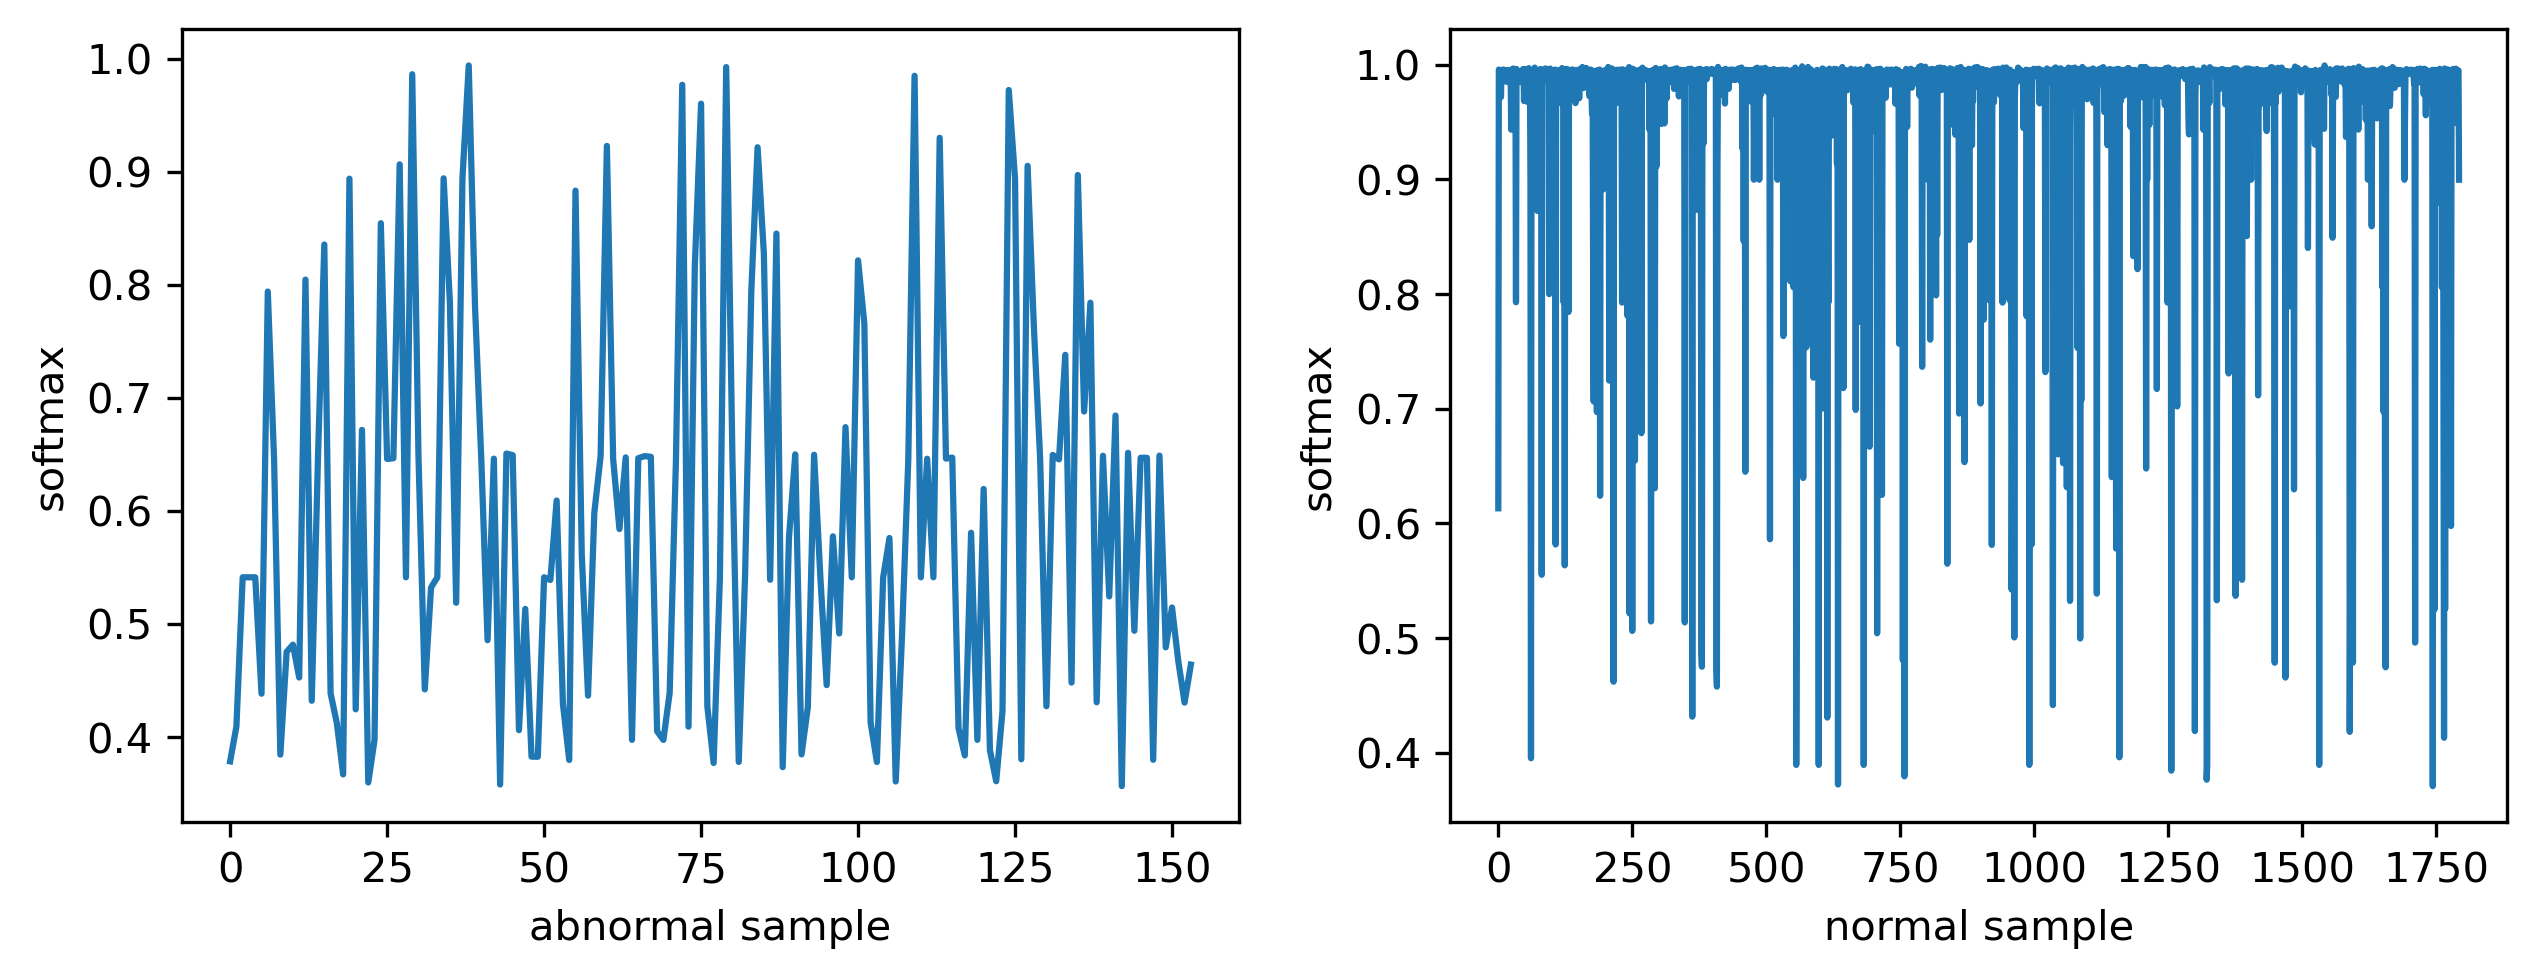

In [4]:
data_id = pd.DataFrame(soft_id, columns=['id'])
data_ood = pd.DataFrame(soft_ood, columns=['id'])

import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 3.5),dpi=300)
ax = fig.add_subplot(121)
sns.lineplot(data=data_ood['id'], ax=ax)
plt.ylabel("softmax")
plt.xlabel("abnormal sample")

ax = fig.add_subplot(122)
sns.lineplot(data=data_id['id'], ax=ax)
plt.ylabel("softmax")
plt.xlabel("normal sample")
plt.savefig("./figures/entropy_analyse.png")

In [6]:
print(np.std(soft_id))
print(np.std(soft_ood))

0.10339372
0.17761636
